# Question 1
*Amir Hossein Mansoori - 99243069*

Import required modules:

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset:

In [145]:
laliga_matches = pd.read_csv('LaLiga_Matches_1995-2021.csv')

Get all the seasons:

In [146]:
seasons = laliga_matches['Season'].unique()

For every season, filter the dataset to only contain match records for that season. Then go through all records and calculate scores of all teams in that season. Finally, add the team with maximum score to the champaions list:

In [147]:
champions = {}

for season in seasons:
    matches_in_current_season = laliga_matches.loc[laliga_matches['Season'] == season]
    teams_scores = {}
    goal_diff = {}
    
    for index, row in matches_in_current_season.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        home_team_goals = row['FTHG']
        away_team_goals = row['FTAG']
        result = row['FTR']
        
        if home_team not in teams_scores:
            teams_scores[home_team] = 0
        if home_team not in goal_diff:
            goal_diff[home_team] = 0
        if away_team not in teams_scores:
            teams_scores[away_team] = 0
        if away_team not in goal_diff:
            goal_diff[away_team] = 0
        
        goal_diff[home_team] += (home_team_goals - away_team_goals)
        goal_diff[away_team] += (away_team_goals - home_team_goals)
        
        if result == 'H':
            teams_scores[home_team] += 3
        elif result == 'A':
            teams_scores[away_team] += 3
        elif result == 'D':
            teams_scores[home_team] += 1
            teams_scores[away_team] += 1

    max_score = max(teams_scores.values())
    teams_with_max_scores = {k:v for k,v in teams_scores.items() if v == max_score}
    if len(teams_with_max_scores) == 1:
        champions[season] = list(teams_with_max_scores.keys())[0]
    else:
        team1 = list(teams_with_max_scores.keys())[0]
        team2 = list(teams_with_max_scores.keys())[1]
        
        result_1v2 = matches_in_current_season.loc[(matches_in_current_season['HomeTeam'] == team1) & (matches_in_current_season['AwayTeam'] == team2)].iloc[0]['FTR']
        result_2v1 = matches_in_current_season.loc[(matches_in_current_season['HomeTeam'] == team2) & (matches_in_current_season['AwayTeam'] == team1)].iloc[0]['FTR']
        
        
        if result_1v2 == 'H' and result_2v1 in ['A', 'D']:
            champions[season] = team1
        elif result_1v2 == 'A' and result_2v1 in ['H', 'D']:
            champions[season] = team2
        else:
            # use goal difference
            if goal_diff[team1] >= goal_diff[team2]:
                champions[season] = team1
            else:
                champions[season] = team2

Create a dictionary of number of times each team won the league:

In [148]:
champions_count = {}
for team in champions.values():
    if team not in champions_count:
        champions_count[team] = 1
    else:
        champions_count[team] += 1

Convert the result to numpy array, and sort it based on wins:

In [149]:
champions_count_array = np.array(list(champions_count.items()), dtype=[('team', 'object'), ('wins', 'int')])
champions_count_array[::-1].sort(order = 'wins')

Finally, plot the results:

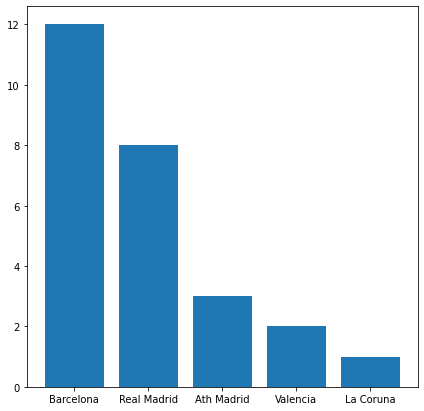

In [150]:
plt.figure(figsize = (7, 7))
plt.xticks(range(len(champions_count_array)), champions_count_array['team'])
plt.bar(range(len(champions_count_array)), champions_count_array['wins'])
plt.show()

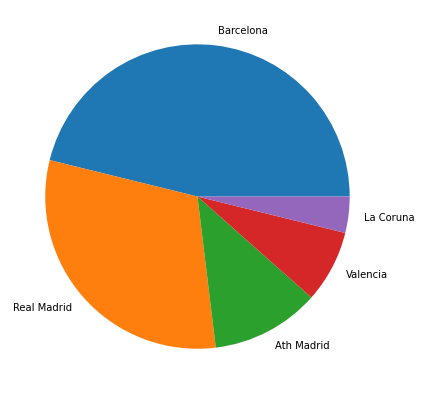

In [151]:
plt.figure(figsize = (7,7))
plt.pie(champions_count_array['wins'], labels=champions_count_array['team'])
plt.show()